**Import Relevant Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preprocessing**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/DL_mini_project2/CSE.csv')
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

**Data Partitioning**

In [ ]:
split_index = int(len(data) * 0.8)
train_data, test_data = data.iloc[:split_index], data.iloc[split_index:]

**See the count of the data sets**

In [ ]:
train_count = len(train_data)
test_count = len(test_data)

print("Number of rows in train_data:", train_count)
print("Number of rows in test_data:", test_count)

Number of rows in train_data: 4408
Number of rows in test_data: 1102


**Normalization**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_data[['Close']])
test_data_normalized = scaler.transform(test_data[['Close']])

**Sequence Creation**

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(train_data_normalized, seq_length)
X_test, y_test = create_sequences(test_data_normalized, seq_length)

**Model Training**

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
137/137 [==============================] - 11s 45ms/step - loss: 0.0055
Epoch 2/10
137/137 [==============================] - 5s 35ms/step - loss: 2.3761e-04
Epoch 3/10
137/137 [==============================] - 4s 30ms/step - loss: 2.1688e-04
Epoch 4/10
137/137 [==============================] - 4s 27ms/step - loss: 2.0757e-04
Epoch 5/10
137/137 [==============================] - 4s 31ms/step - loss: 1.8821e-04
Epoch 6/10
137/137 [==============================] - 5s 35ms/step - loss: 1.8226e-04
Epoch 7/10
137/137 [==============================] - 4s 27ms/step - loss: 1.8880e-04
Epoch 8/10
137/137 [==============================] - 4s 27ms/step - loss: 1.8233e-04
Epoch 9/10
137/137 [==============================] - 5s 38ms/step - loss: 1.3614e-04
Epoch 10/10
137/137 [==============================] - 4s 27ms/step - loss: 1.3554e-04


**Evaluation**

In [ ]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = predicted_stock_prices.reshape(-1, 1)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

34/34 [==============================] - 2s 10ms/step


**Compute RMSE**

In [76]:
actual_stock_prices = test_data['Close'][seq_length:]
rmse = math.sqrt(mean_squared_error(actual_stock_prices, predicted_stock_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 122.1417848041054


**Plotting Actual vs. Predicted Stock Prices**

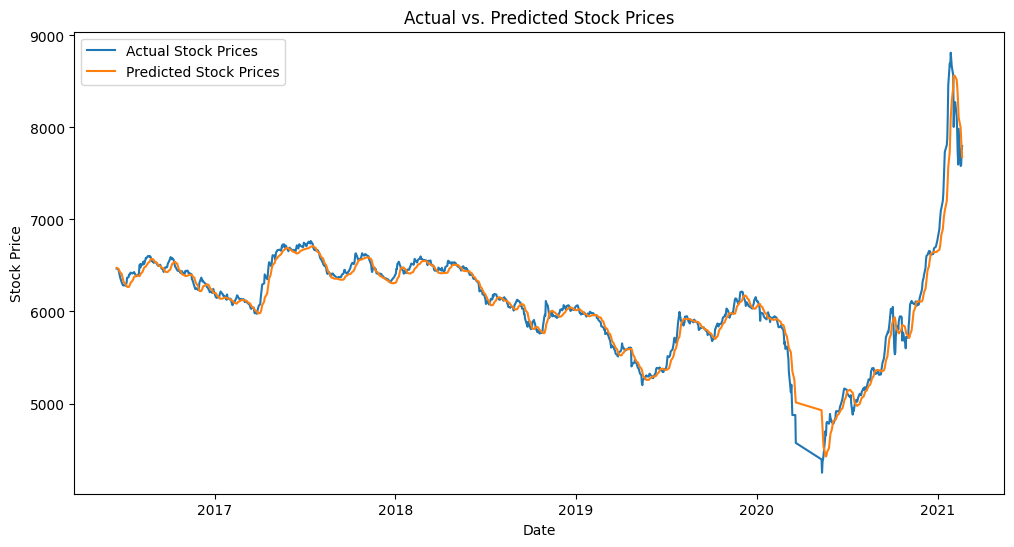

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length:], test_data['Close'][seq_length:], label='Actual Stock Prices')
plt.plot(test_data.index[seq_length:], predicted_stock_prices, label='Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()